/tmp/ipython-input-3422750379.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3422750379.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3422750379.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3422750379.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3422750379.py:26: FutureWarning: 

Passin

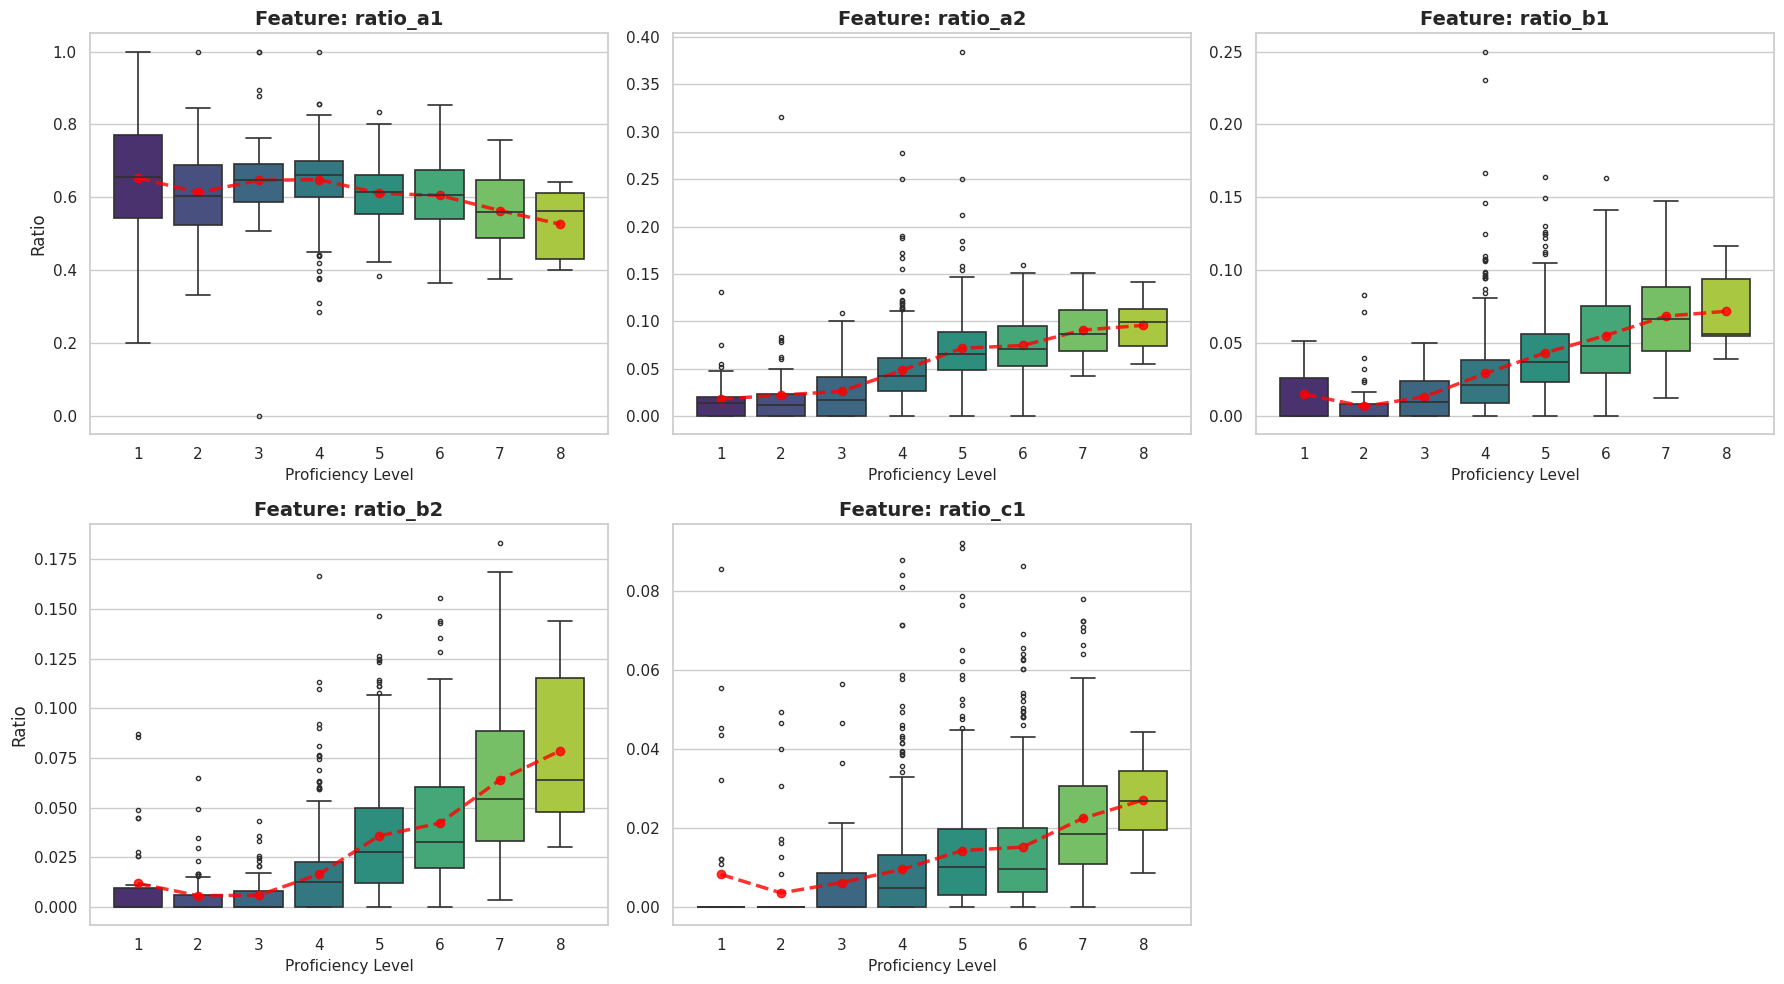

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

vocab_cols = ['ratio_a1', 'ratio_a2', 'ratio_b1', 'ratio_b2', 'ratio_c1']

n_cols = 3  
n_rows = 2  
plt.figure(figsize=(18, 10))

sns.set_theme(style="whitegrid")



for i, feature in enumerate(vocab_cols):
    plt.subplot(n_rows, n_cols, i + 1)


    sns.boxplot(
        data=df,
        x='label',
        y=feature,
        palette="viridis",
        linewidth=1.2,
        fliersize=3,
        order=sorted_labels
    )

    means = df.groupby('label')[feature].mean()
    plt.plot(range(len(sorted_labels)), means.values,
             color='red', alpha=0.8, linewidth=2.5, linestyle='--', marker='o')

    
    plt.title(f"Feature: {feature}", fontsize=14, fontweight='bold')
    plt.xlabel("Proficiency Level", fontsize=11)

    if i % n_cols == 0:
        plt.ylabel("Ratio", fontsize=12)
    else:
        plt.ylabel("")


if len(vocab_cols) < n_rows * n_cols:
    for j in range(len(vocab_cols), n_rows * n_cols):
        fig = plt.gcf()
        ax = fig.add_subplot(n_rows, n_cols, j + 1)
        ax.axis('off')

plt.tight_layout()
plt.savefig("vocab_ratios_2rows.png", dpi=300)
plt.show()

In [ ]:
df = pd.read_csv("training_data.csv")
features_df = pd.read_csv("training_features_extended_final.csv")



/tmp/ipython-input-1952823641.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_length.values, y=correlations_with_length.index, palette=colors_leak)


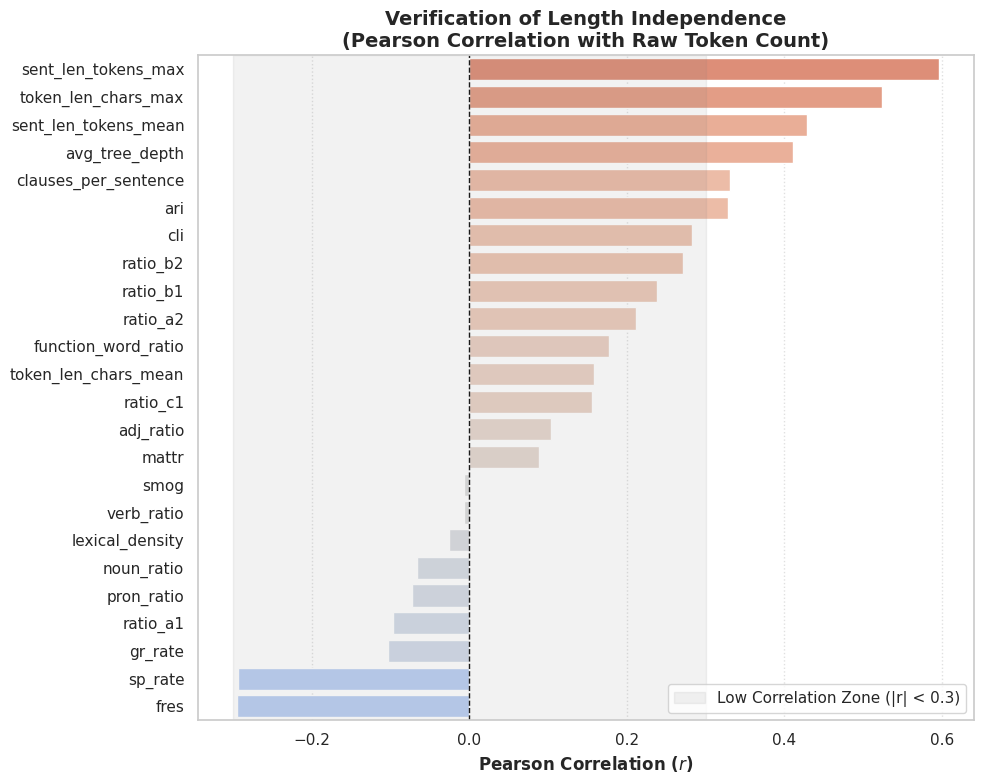

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import matplotlib.cm as cm

df['raw_token_count'] = df['text'].apply(lambda x: len(x.split()))

correlations_with_length = features_df.join(df['raw_token_count']).corrwith(df['raw_token_count'])
correlations_with_length = correlations_with_length.drop(['label', 'raw_token_count']).sort_values(ascending=False)


norm_leak = plt.Normalize(-1, 1)
colors_leak = [cm.coolwarm(norm_leak(v)) for v in correlations_with_length.values]

plt.figure(figsize=(10, 8))
sns.barplot(x=correlations_with_length.values, y=correlations_with_length.index, palette=colors_leak)

plt.title("Verification of Length Independence\n(Pearson Correlation with Raw Token Count)", fontsize=14, fontweight='bold')
plt.xlabel("Pearson Correlation ($r$)", fontsize=12, fontweight='bold')
plt.ylabel("")
plt.axvline(0, color='k', linestyle='--', linewidth=1)
plt.grid(axis='x', linestyle=':', alpha=0.6)

plt.axvspan(-0.3, 0.3, color='grey', alpha=0.1, label='Low Correlation Zone (|r| < 0.3)')
plt.legend(loc='lower right')

plt.tight_layout()
plt.savefig("length_leakage_check.png", dpi=300)
plt.show()